# **Análisis Predictivo de Tipos de Transacción: Clasificación de Operaciones Financieras**  

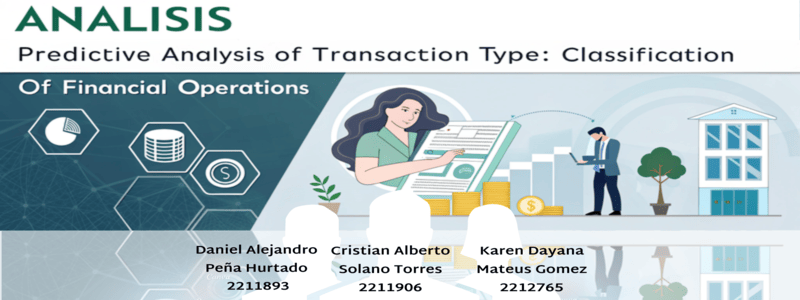


# ***PRIMERA ENTREGA***

## **Caracteristicas clave**

| **Atributo**                 | **Descripción**                                                                                                                                                          |
|------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1. TransactionID**          | Identificador alfanumérico único para cada transacción, esencial para rastrear y referenciar operaciones individuales.                                                    |
| **2. AccountID**              | Identificador único para cada cuenta. Una misma cuenta puede contener múltiples transacciones, lo que permite analizar el historial de actividad de cada cliente.           |
| **3. TransactionAmount**      | Valor monetario de cada transacción. Puede abarcar desde gastos pequeños del día a día hasta compras de mayor cuantía.                                                     |
| **4. TransactionDate**        | Marca de tiempo que registra la fecha y hora de cada transacción, fundamental para analizar la estacionalidad o la frecuencia de las operaciones.                          |
| **5. TransactionType**        | Campo categórico que indica si la transacción es un Crédito o un Débito, ayudando a distinguir el tipo de operación financiera.                                           |
| **6. Ubicación**              | Ubicación geográfica de la transacción, representada por nombres de ciudades en Estados Unidos. Este dato resulta útil para detectar patrones de fraude basados en la localización. |
| **7. DeviceID**               | Identificador alfanumérico de los dispositivos utilizados para efectuar la transacción, permitiendo detectar usos de dispositivos desconocidos o sospechosos.               |
| **8. Dirección IP**           | Dirección IPv4 asociada a la transacción. Algunas cuentas pueden mostrar cambios frecuentes de IP, lo que puede indicar comportamiento inusual.                            |
| **9. MerchantID**             | Identificador único para cada comerciante. Permite distinguir patrones de compra regulares y detectar comerciantes atípicos para cada cuenta.                              |
| **10. AccountBalance**        | Saldo de la cuenta después de la transacción. Resulta útil para analizar la consistencia de los movimientos financieros según el tipo y el monto de la operación.            |
| **11. PreviousTransactionDate**| Marca de tiempo de la última transacción asociada a la misma cuenta. Facilita el cálculo de la frecuencia y los intervalos entre operaciones.                             |
| **12. Canal**                 | Medio por el cual se realizó la transacción (por ejemplo, Online, ATM, Branch), ofreciendo perspectivas sobre el comportamiento de uso de cada cliente.                     |
| **13. CustomerAge**           | Edad del titular de la cuenta, que puede estar agrupada según rangos o cohortes lógicas relacionadas con la ocupación o el perfil de ingresos.                            |
| **14. CustomerOccupation**    | Ocupación del titular de la cuenta (por ejemplo, Doctor, Ingeniero, Estudiante, Jubilado). Este atributo contribuye al análisis de patrones de ingresos y gastos.            |
| **15. TransactionDuration**   | Duración de la transacción en segundos. Varía según el tipo de operación y puede indicar actividades inusuales si supera o es menor a los valores habituales.               |
| **16. LoginAttempts**         | Número de intentos de inicio de sesión antes de concretar la transacción. Un número elevado de intentos podría señalar comportamiento potencialmente fraudulento.            |


## Acerca de Dataset


* **TransactionAmount, AccountBalance** → Valores numéricos flotantes.
* **CustomerAge, TransactionDuration, LoginAttempts** → Valores numéricos enteros.
* **TransactionType, Location, Channel, CustomerOccupation** → Datos categóricos.
* **TransactionDate, PreviousTransactionDate** → Fechas en formato de texto



In [ ]:
#@title Montar en el Drive
# Importante: Si está desde la carpeta compartida, añadir un acceso directo a su Unidad, para poder correr bien el dataset
import os
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive', force_remount=True)

path_project = "ProyectoIA1" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_project
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1C_6DHLfqzJml_kwyWCm5iuIyd6w9aFRB/ProyectoIA1


In [ ]:
#@title Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title Carga del Dataset
a =  pd.read_csv("/content/drive/MyDrive/ProyectoIA1/data/bank_transactions_data_2.csv")

In [ ]:
#@title Mostrar los datos, ver las columnas y su estructura (dimensiones)
print("columns and shape", a.columns, a.shape)

columns and shape Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object') (2512, 16)


In [ ]:
a.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
#@title Mostrar descripción estadística del dataset
display(a.describe())

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [ ]:
# @title Función para graficar multiples variables
def plot_distribution(column_name, df, ids_per_plot=20):
    unique_ids = df[column_name].value_counts()
    num_plots = int(np.ceil(len(unique_ids) / ids_per_plot))

    for i in range(num_plots):
        plt.figure(figsize=(12, 6))

        subset = unique_ids[i * ids_per_plot : (i + 1) * ids_per_plot]
        subset.plot(kind="bar", color=plt.cm.Paired(i % 12), edgecolor="black")

        plt.title(f"Frecuencia de {column_name} ({i+1})", fontsize=16, fontweight="bold")
        plt.xlabel(column_name, fontsize=14, fontweight="bold")
        plt.ylabel("Cantidad de Transacciones", fontsize=14, fontweight="bold")
        plt.xticks(rotation=45, fontsize=12)
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        plt.tight_layout()
        plt.show()

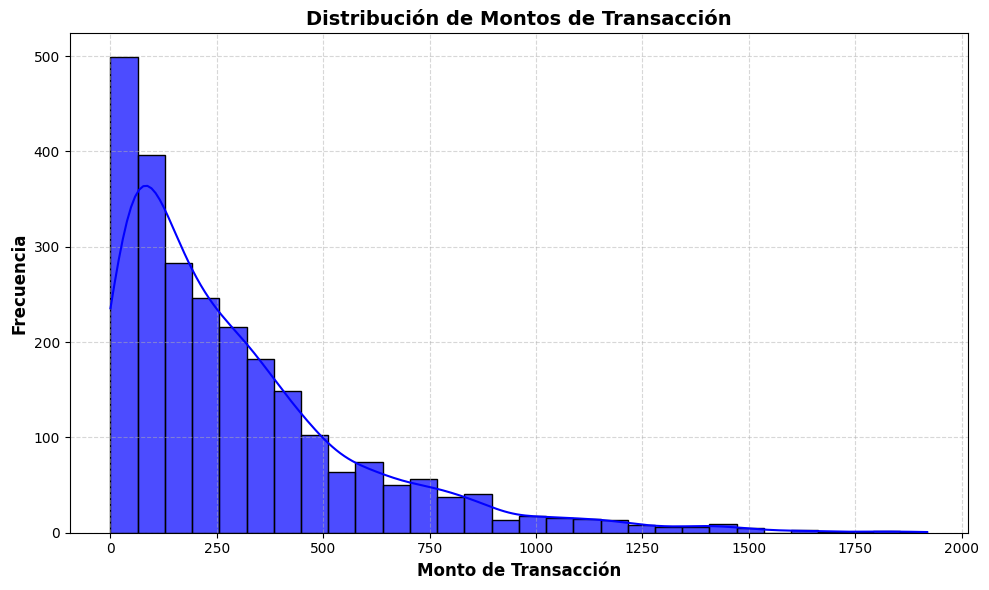

In [ ]:
# @title TransactionAmount
plt.figure(figsize=(10, 6))
sns.histplot(a['TransactionAmount'], bins=30, kde=True, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Monto de Transacción', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Frecuencia', fontsize=12, fontweight='bold', color='black')
plt.title('Distribución de Montos de Transacción', fontsize=14, fontweight='bold', color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El histograma muestra la distribución de los montos de transacción, con la mayoría de los valores concentrados en el rango de 0 dólares a 250 dólares. A medida que los montos aumentan, la frecuencia de transacciones disminuye significativamente, y son muy pocos los casos con montos superiores a 1000 dólares.

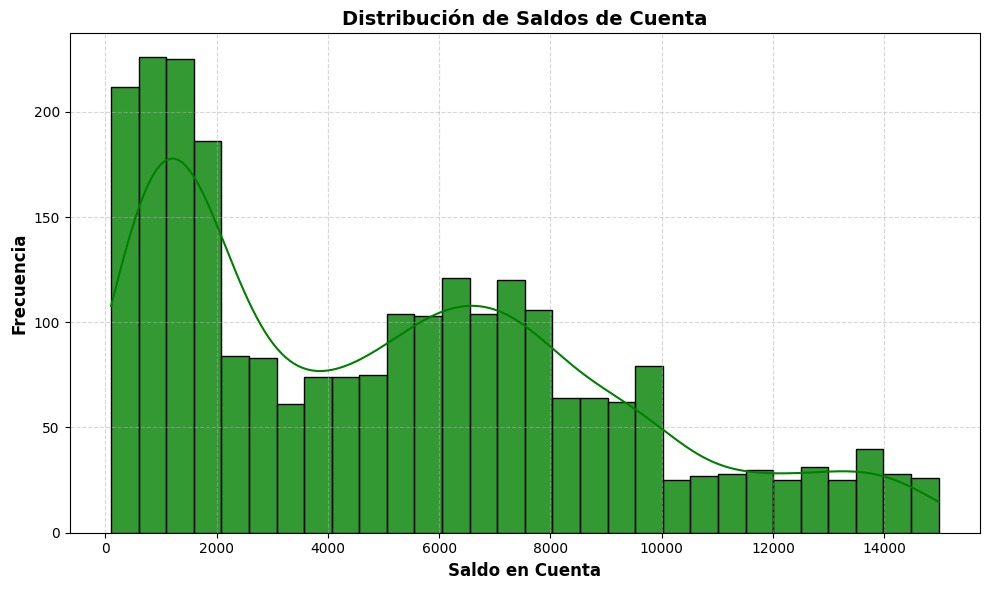

In [ ]:
# @title AccountBalance
plt.figure(figsize=(10, 6))
sns.histplot(a['AccountBalance'], bins=30, kde=True, color='green', alpha=0.8, edgecolor='black')
plt.xlabel('Saldo en Cuenta', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Frecuencia', fontsize=12, fontweight='bold', color='black')
plt.title('Distribución de Saldos de Cuenta', fontsize=14, fontweight='bold', color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El histograma muestra la distribución de los saldos de cuenta, con la mayoría de los valores concentrados en el rango de 0 dólares a 2,000 dólares, donde la frecuencia es alta. A medida que los saldos aumentan, la frecuencia disminuye significativamente, con pocos saldos superiores a 10,000 dólares. El histograma está dividido en 30 intervalos.

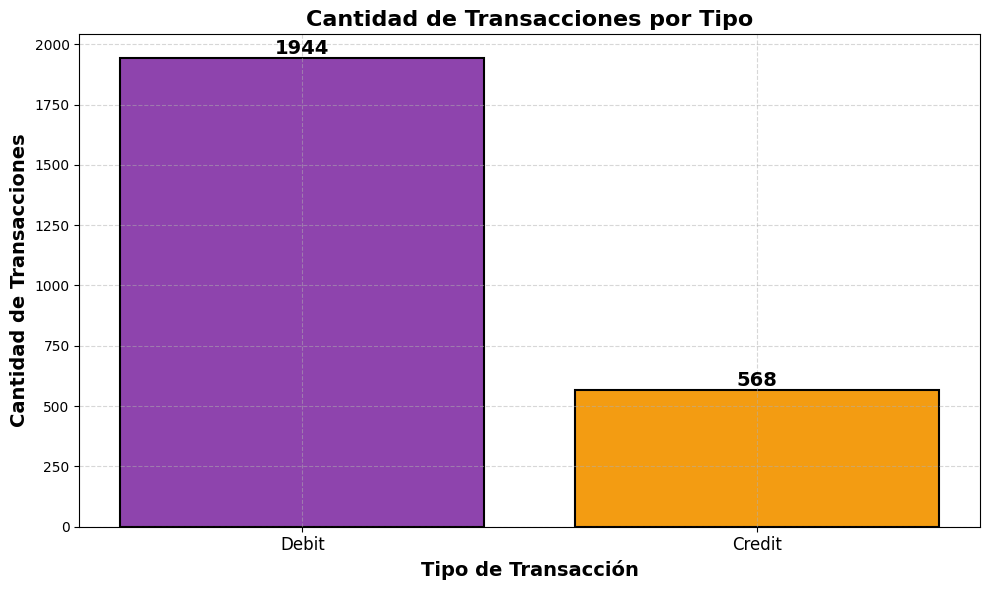

In [ ]:
# @title TransactionType
trans_count = a['TransactionType'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#8e44ad', '#f39c12']
bars = plt.bar(trans_count.index, trans_count.values, color=colors, edgecolor='black', linewidth=1.5)

for bar, count in zip(bars, trans_count):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=14, fontweight='bold', color='black')

plt.xlabel('Tipo de Transacción', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Cantidad de Transacciones', fontsize=14, fontweight='bold', color='black')
plt.title('Cantidad de Transacciones por Tipo', fontsize=16, fontweight='bold', color='black')

plt.xticks(fontsize=12, rotation=0, color='black')

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

El gráfico de barras muestra la cantidad de transacciones según su tipo: Debit y Credit. La barra morada, correspondiente a las transacciones de débito, es notablemente más alta, con un total de **1945** registros. En contraste, la barra amarilla, que representa las transacciones de crédito, alcanza solo **568** registros. Esto sugiere que la mayoría de las transacciones registradas en el conjunto de datos fueron realizadas con débito.

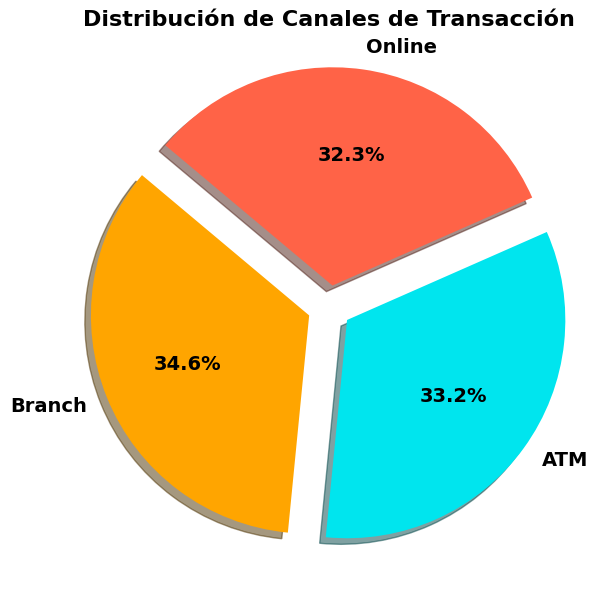

In [ ]:
# @title Channel
channel_counts = a['Channel'].value_counts()

colors = ['#FFA500', '#00E5EE', '#FF6347']
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(10, 6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, startangle=140, shadow=True,
        textprops={'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})

plt.title('Distribución de Canales de Transacción', fontsize=16, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

El gráfico de sectores muestra la distribución de las transacciones según el canal utilizado. El canal **Branch** (sucursal) representa el 34.6% del total de transacciones, siendo el canal con mayor participación. Le sigue el canal **ATM** (cajero automático) con el 33.2%, y finalmente, el canal **Online** (en línea) que abarca el 32.3%.

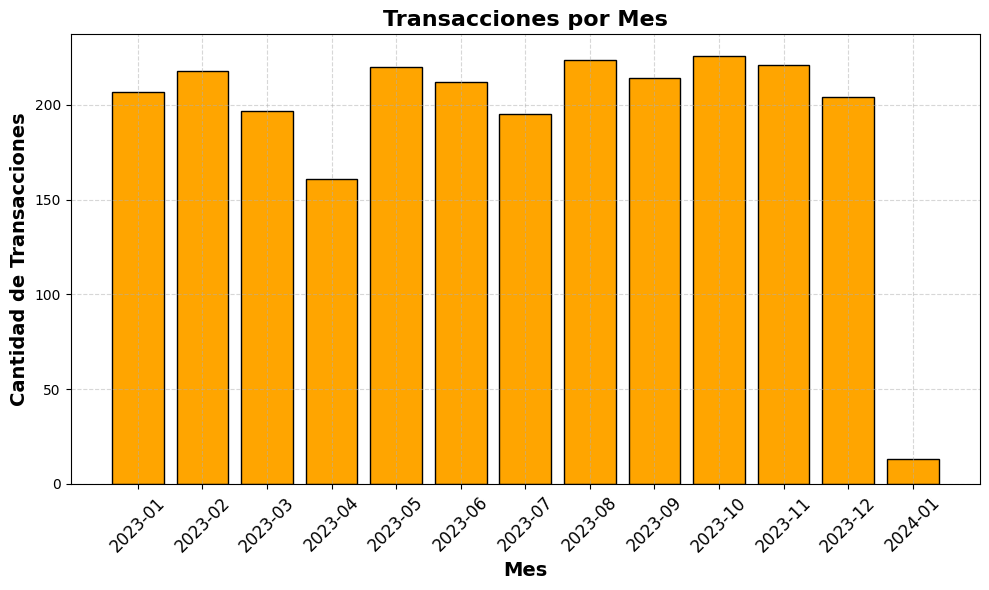

In [ ]:
# @title TransactionDate
a["TransactionDate"] = pd.to_datetime(a["TransactionDate"], errors="coerce")
a["Month"] = a["TransactionDate"].dt.to_period("M")
month_counts = a["Month"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(month_counts.index.astype(str), month_counts.values, color="orange", edgecolor="black")
plt.xlabel("Mes", fontsize=14, fontweight="bold", color="black")
plt.ylabel("Cantidad de Transacciones", fontsize=14, fontweight="bold", color="black")
plt.title("Transacciones por Mes", fontsize=16, fontweight="bold", color="black")
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

El gráfico de barras muestra la cantidad de transacciones por mes, desde enero de 2023 hasta enero de 2024. En general, la cantidad de transacciones se mantiene relativamente constante, con un leve incremento en los meses de **octubre** y **diciembre de 2023**, donde se supera la barrera de las 200 transacciones. No obstante, en **enero de 2024**, se observa una disminución significativa en la cantidad de transacciones, marcando el punto más bajo de todo el periodo. Este comportamiento refleja que, aunque la actividad transaccional es estable a lo largo del año, existen ciertas fluctuaciones, especialmente hacia el final de 2023.

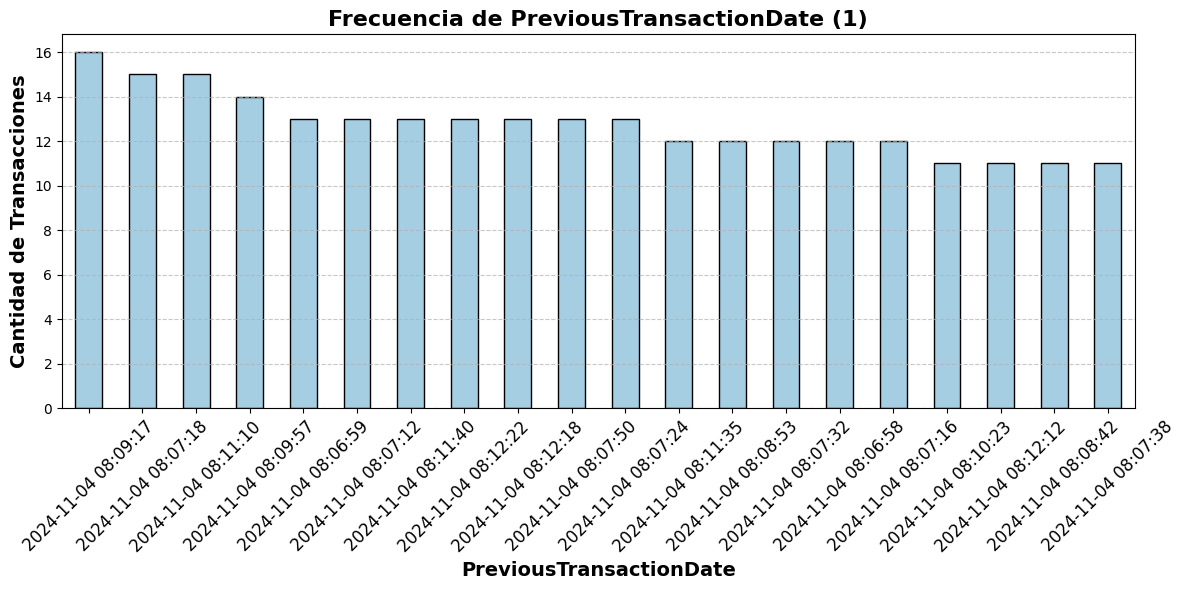

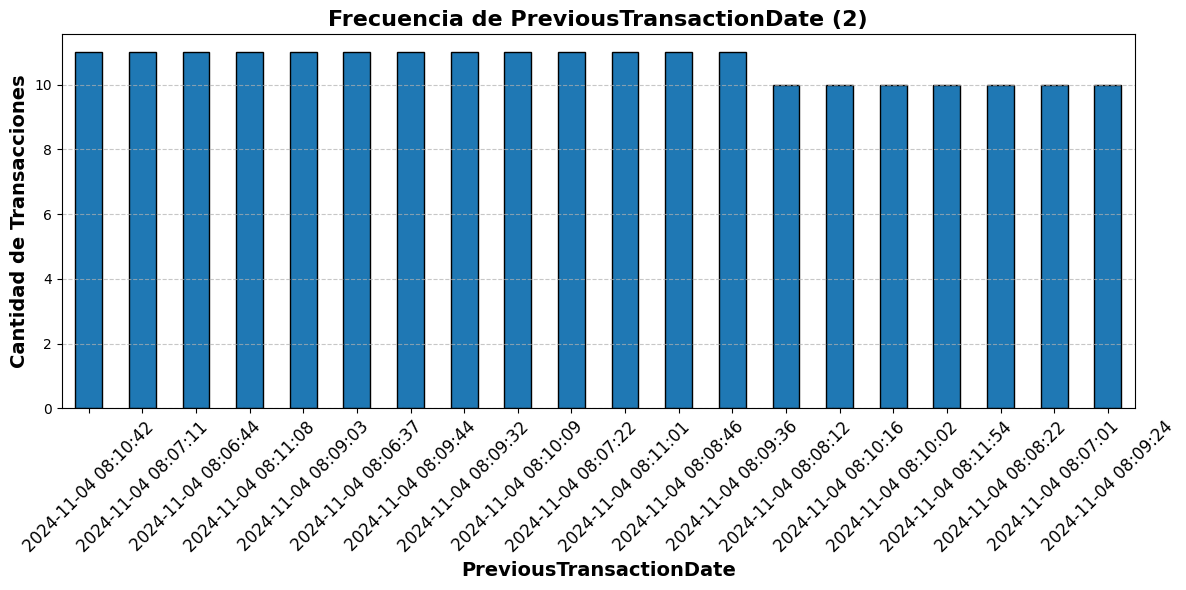

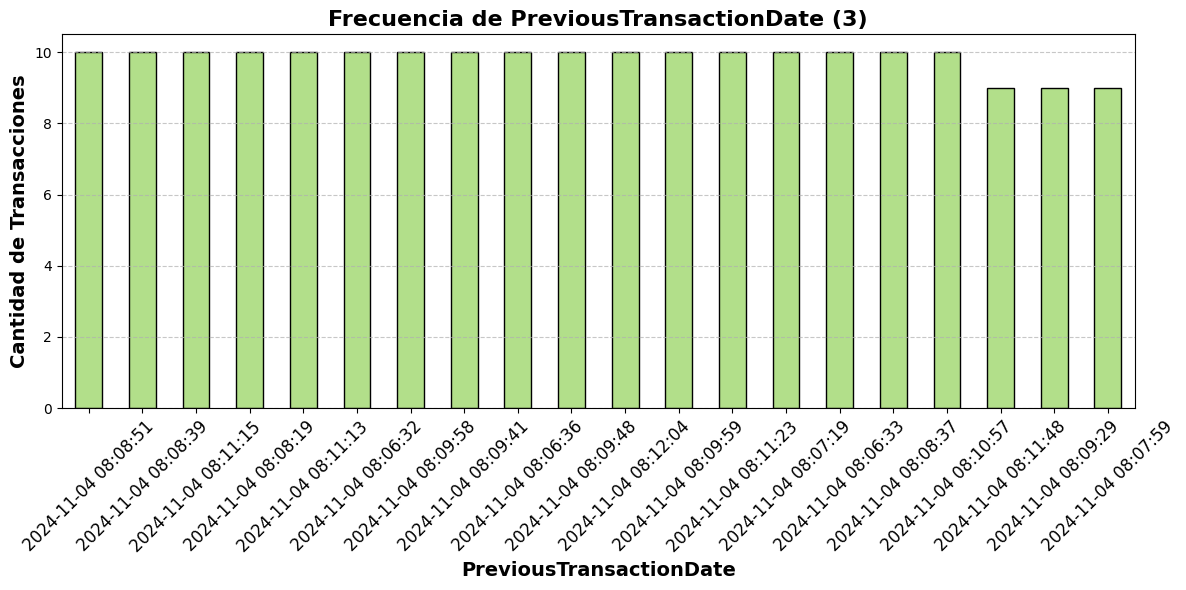

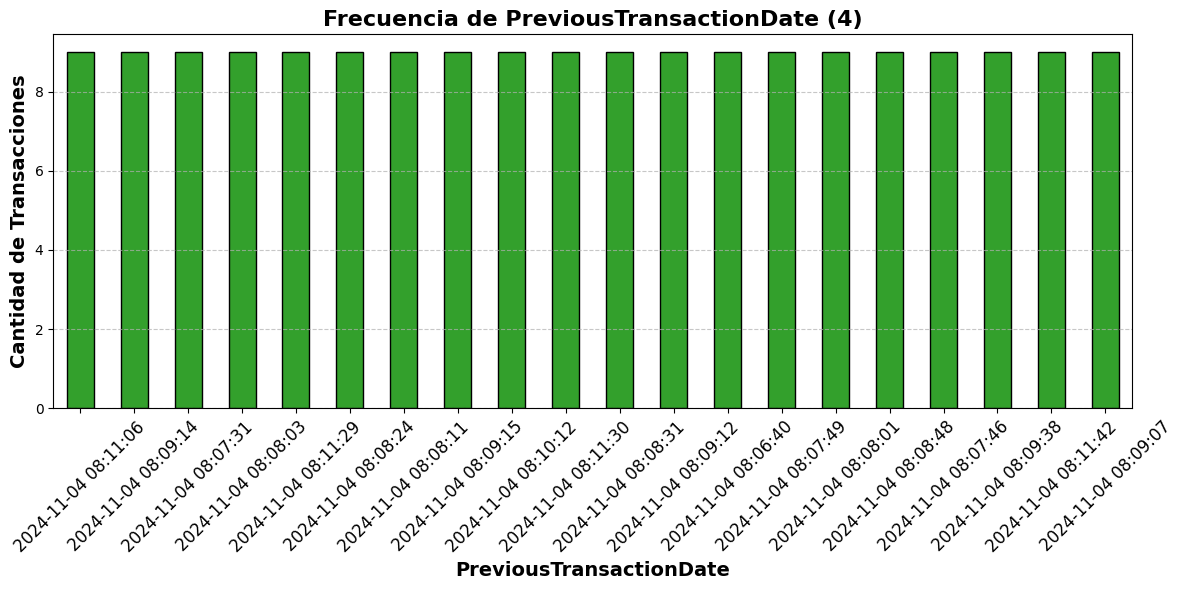

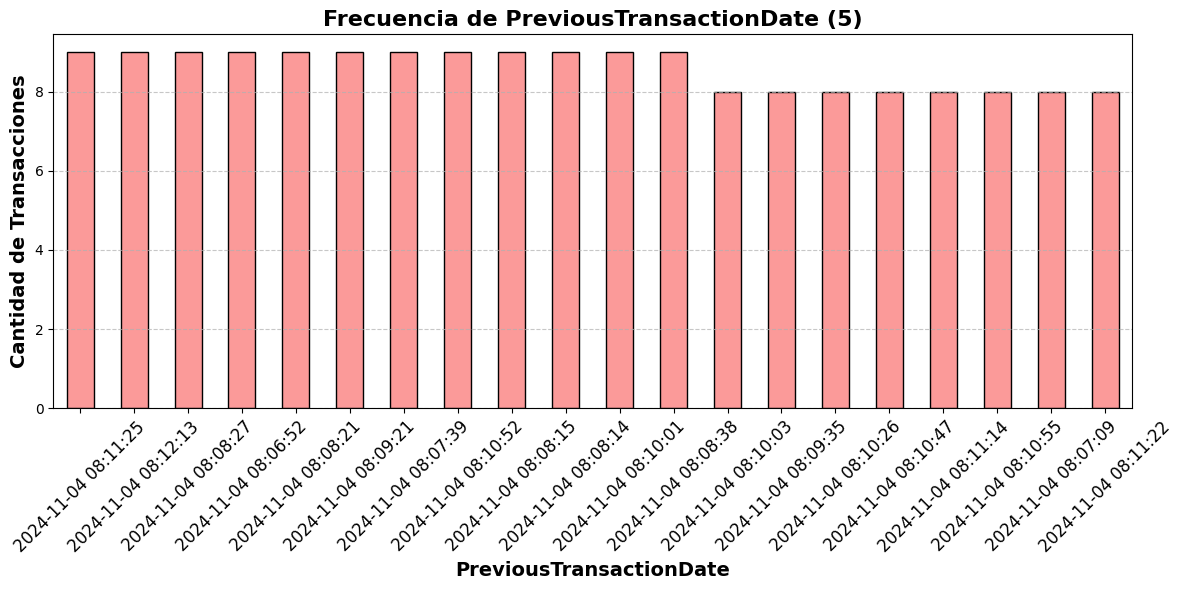

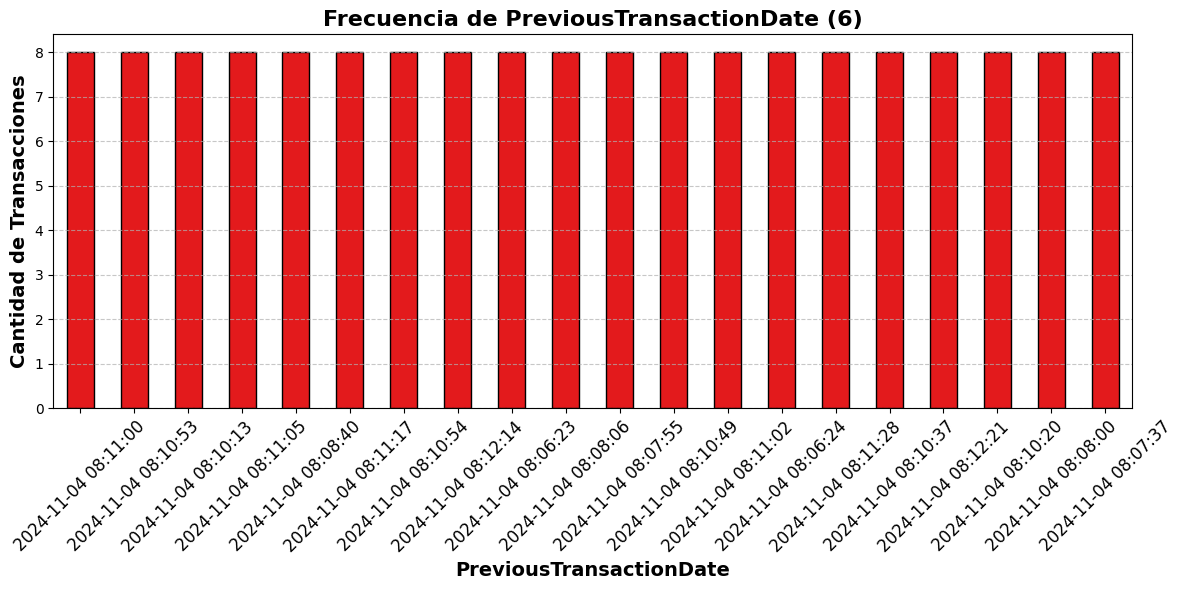

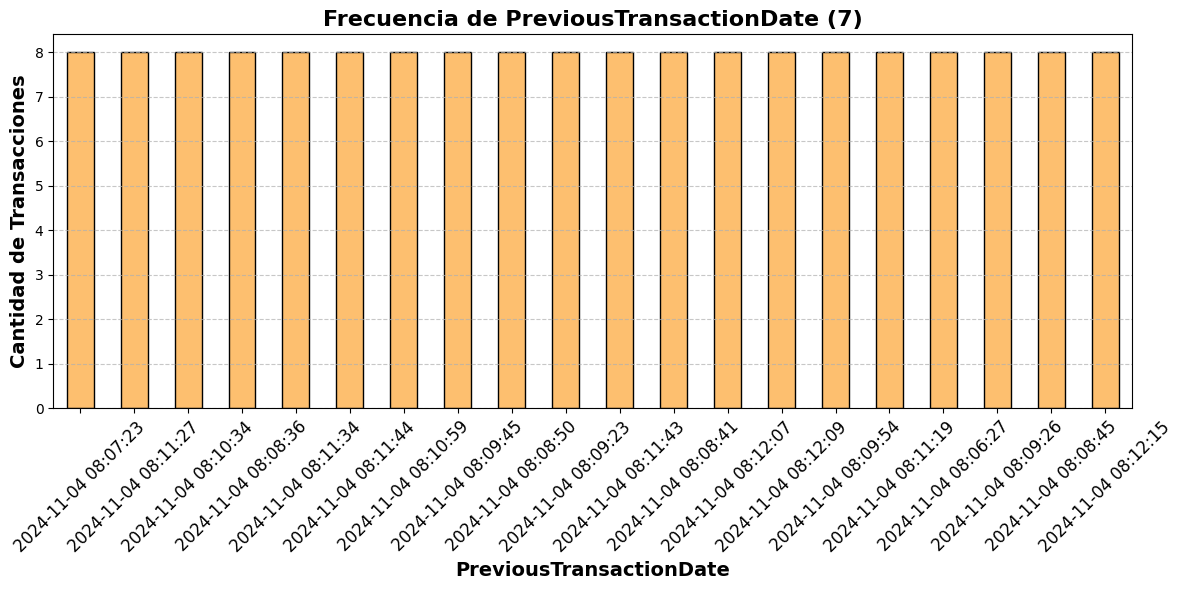

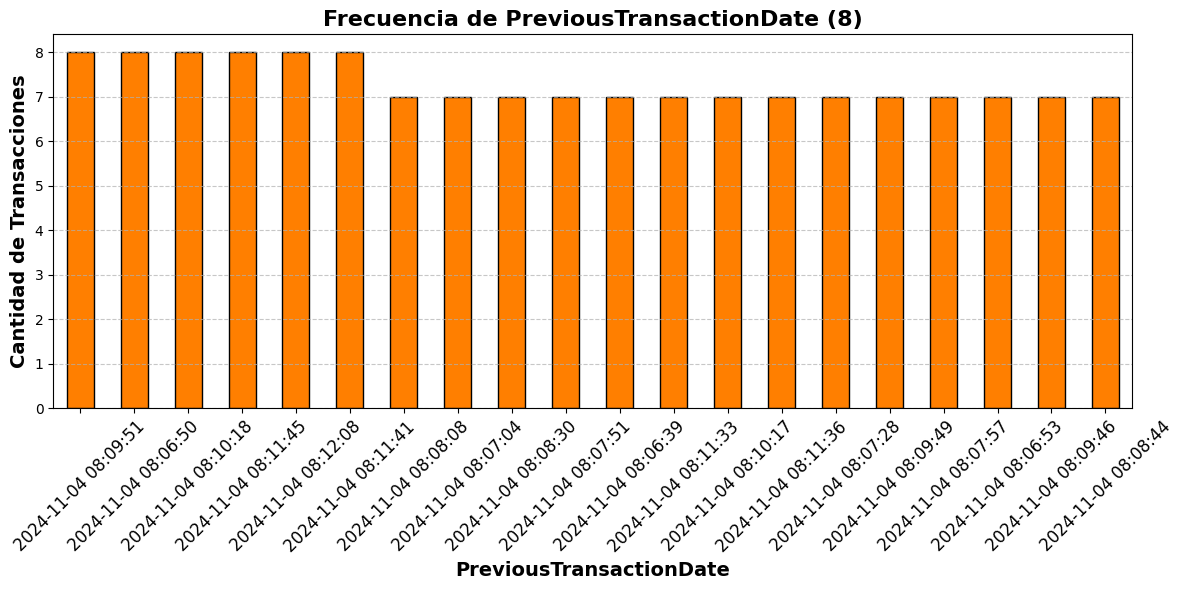

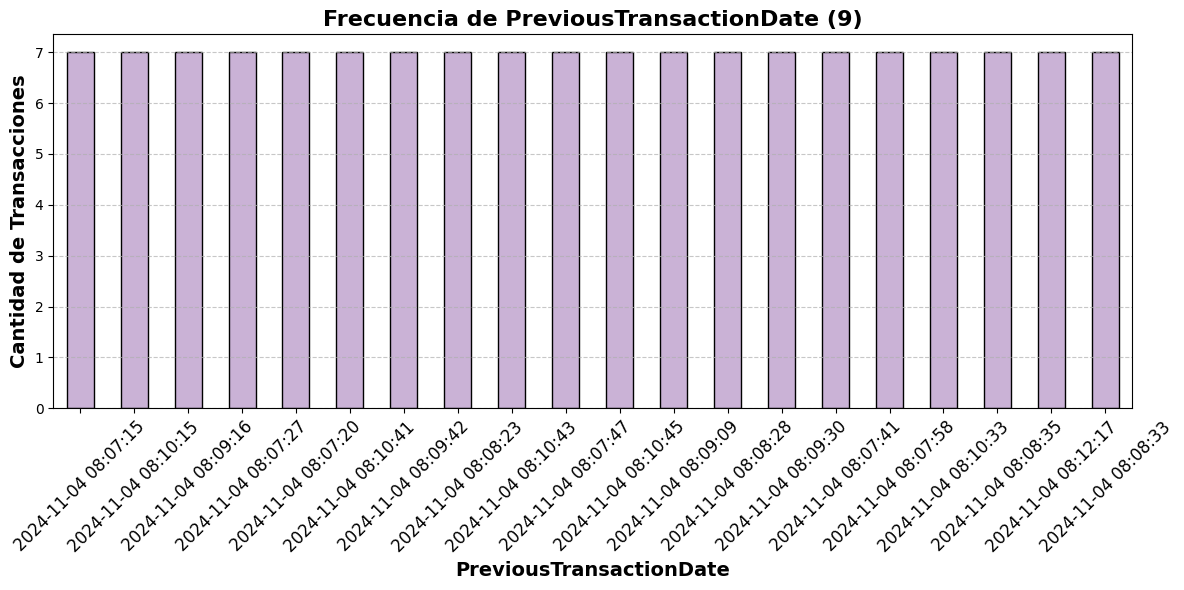

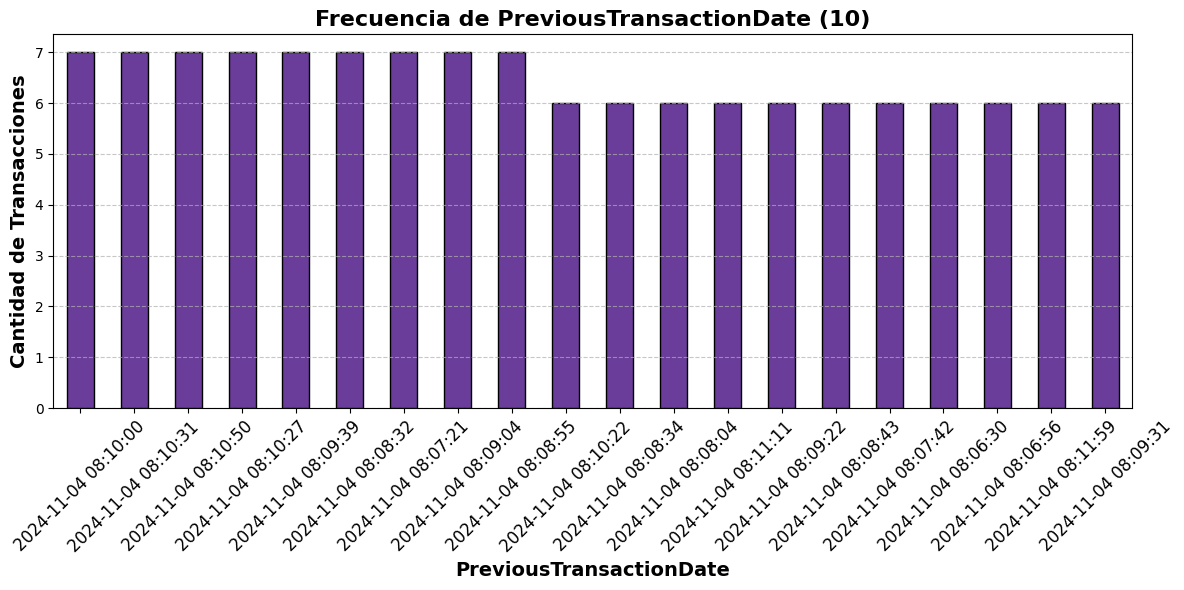

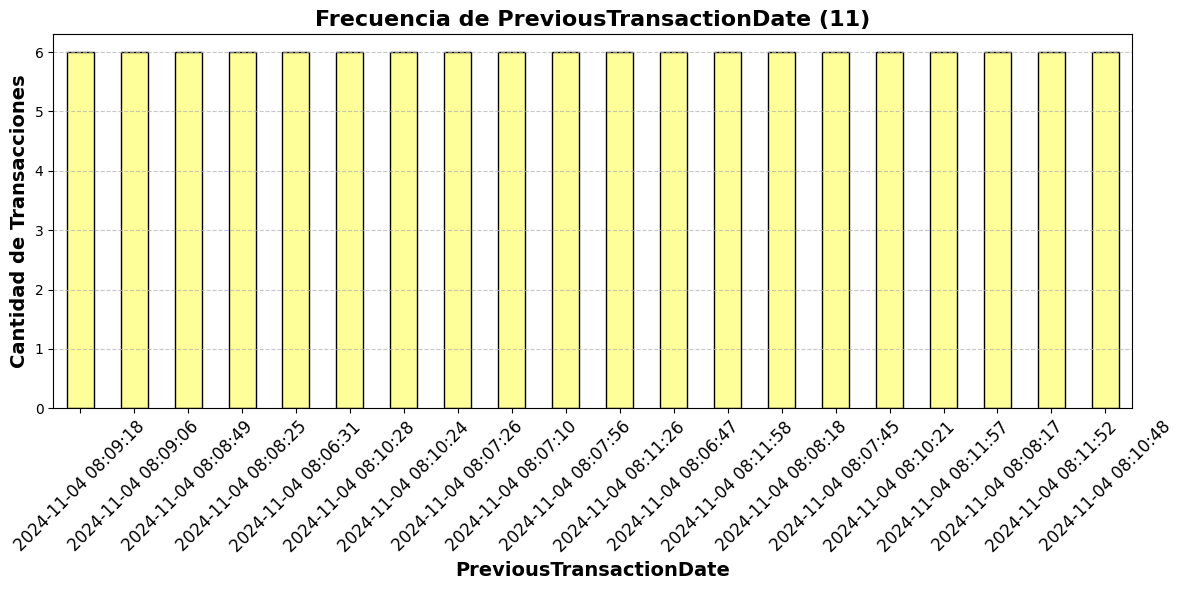

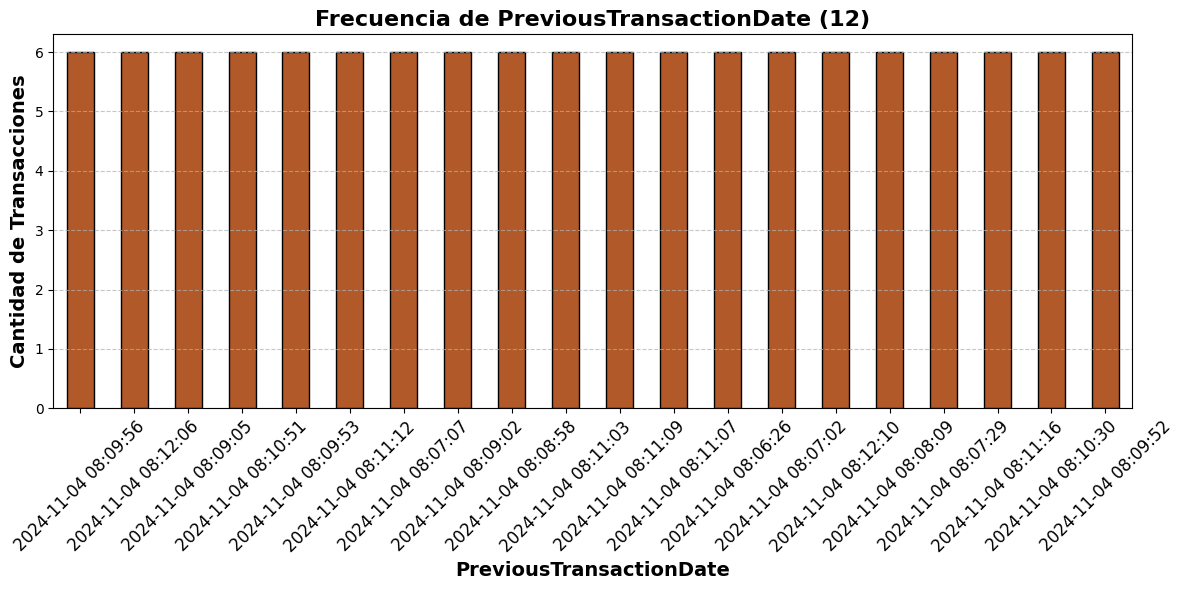

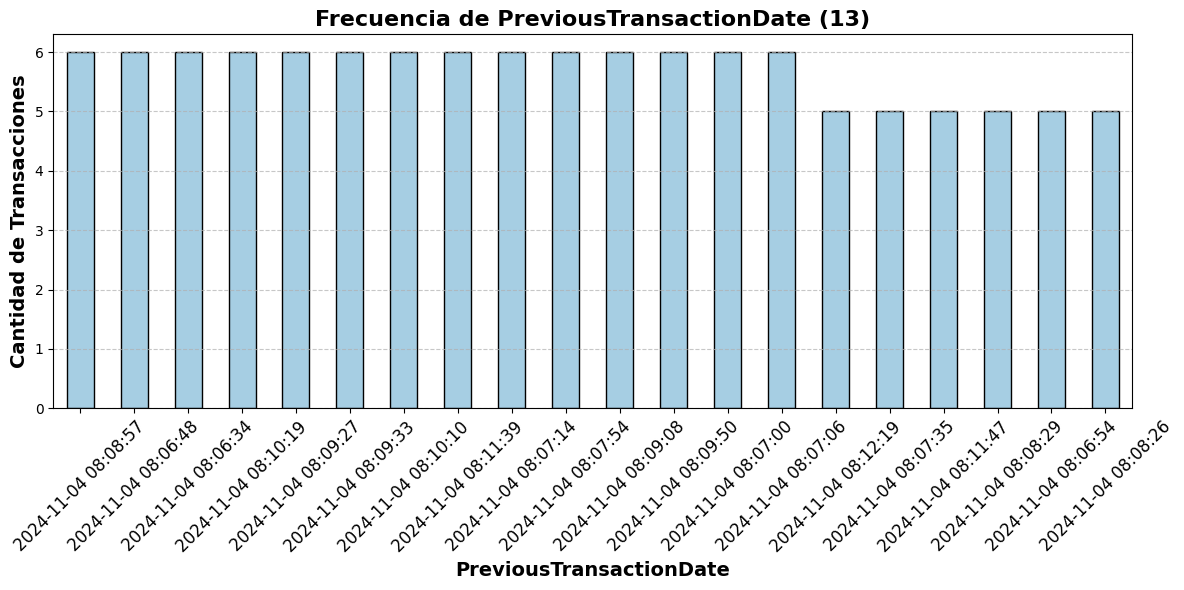

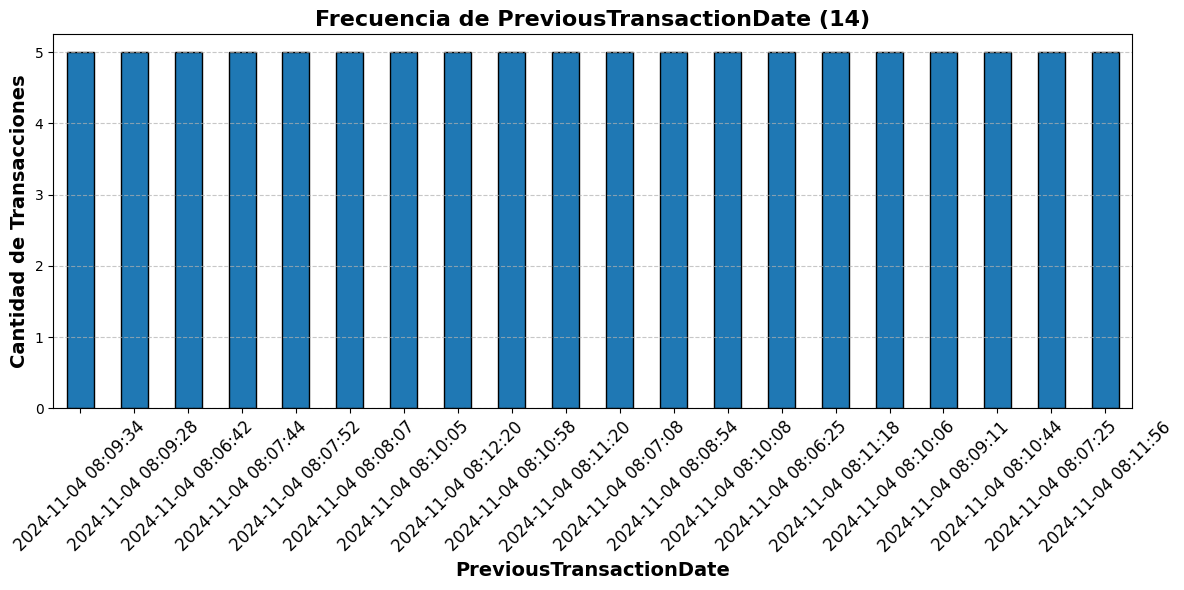

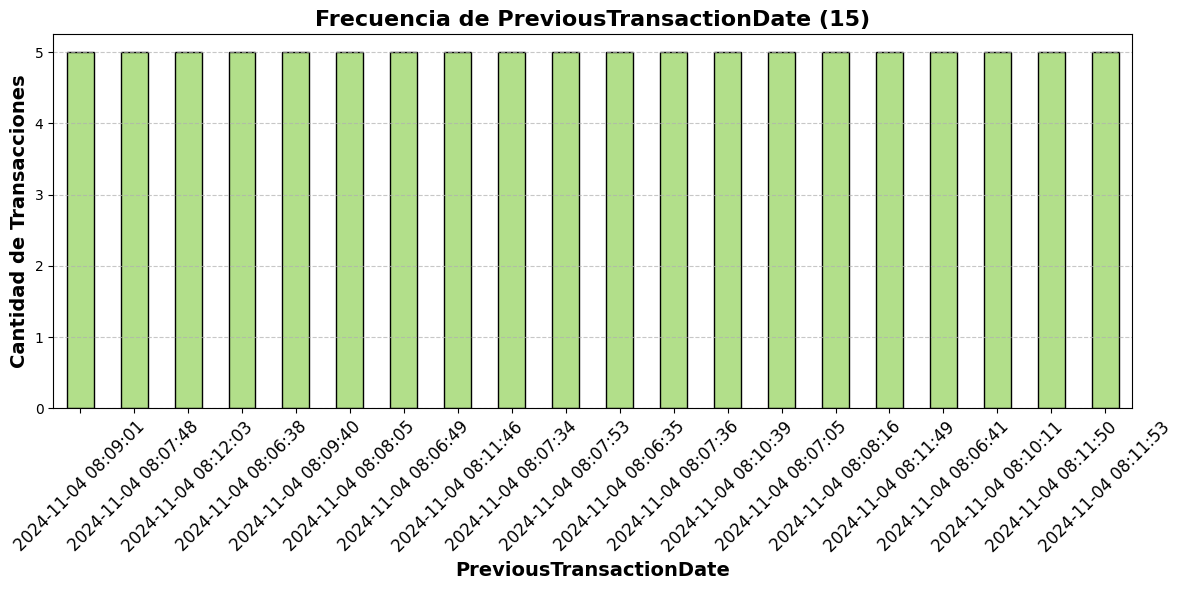

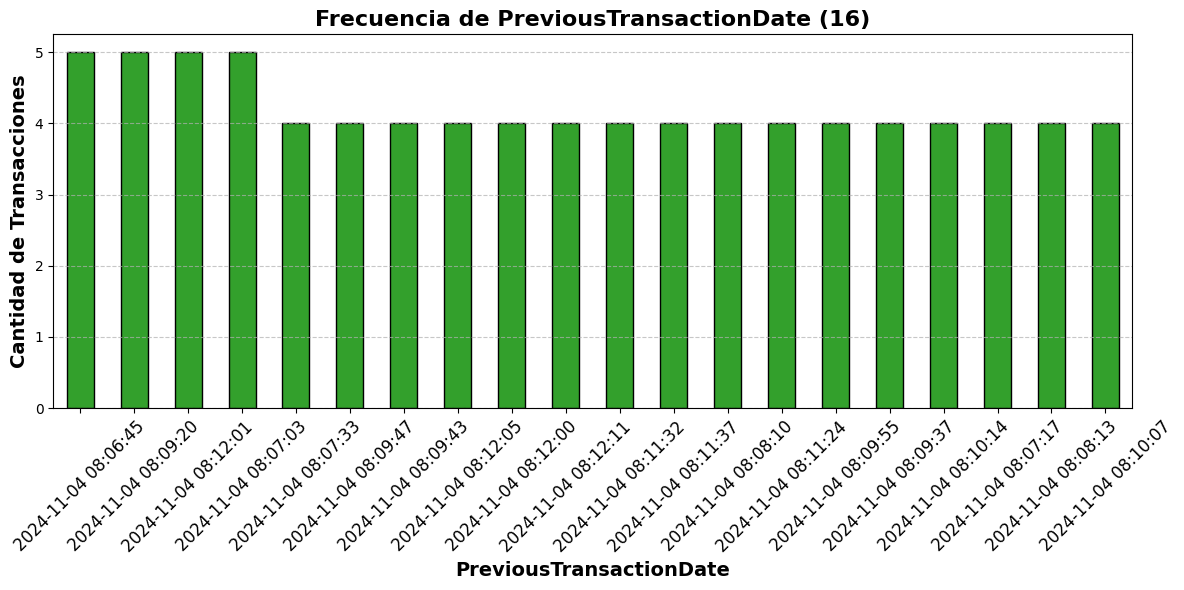

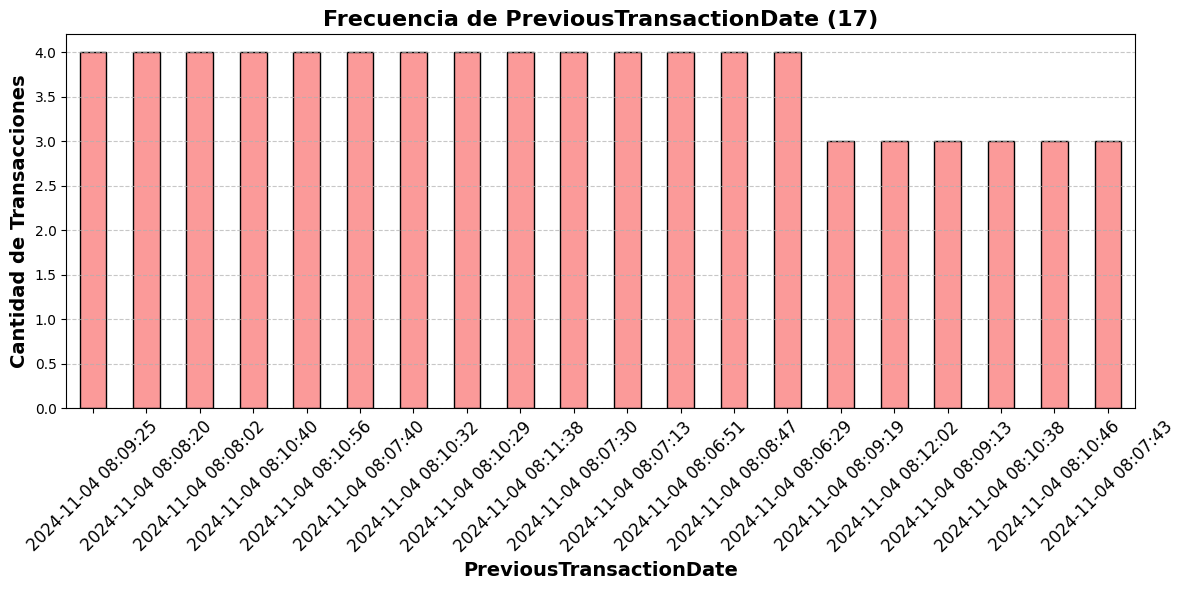

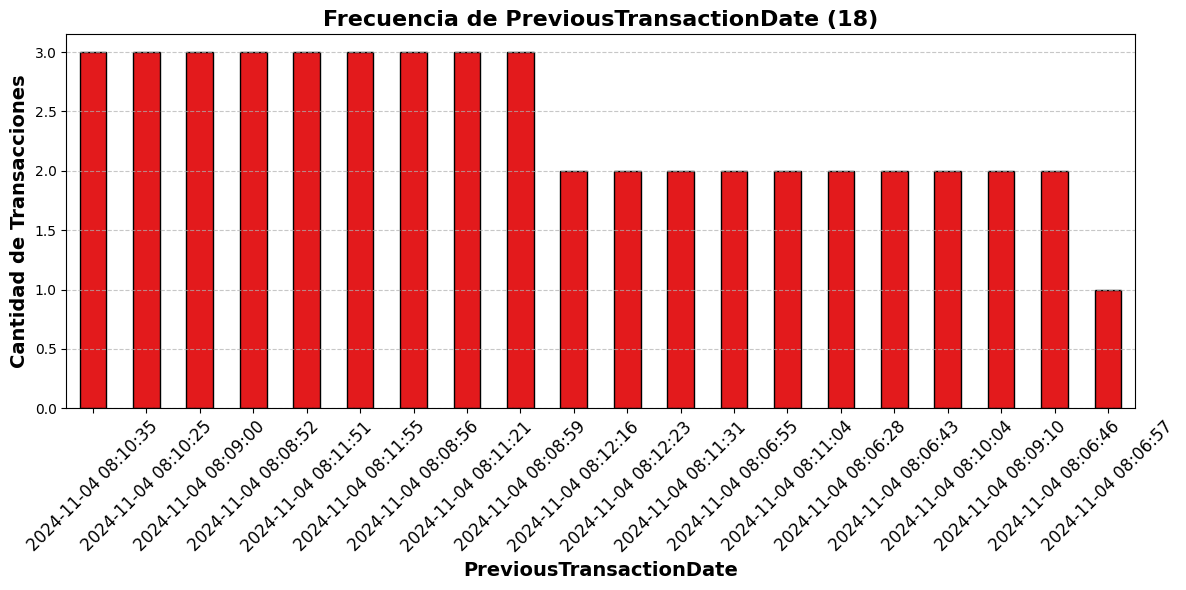

In [ ]:
# @title PreviousTransactionDate
plot_distribution("PreviousTransactionDate", a)

Los gráficos muestran una **distribución constante** de las transacciones a lo largo de diferentes intervalos de tiempo. La frecuencia de transacciones varía entre **7 y 16** por intervalo, con pocas **variaciones**, indicando un patrón **regular y repetitivo** en las transacciones. Esto sugiere que el sistema realiza transacciones de manera **automática y en intervalos específicos**.

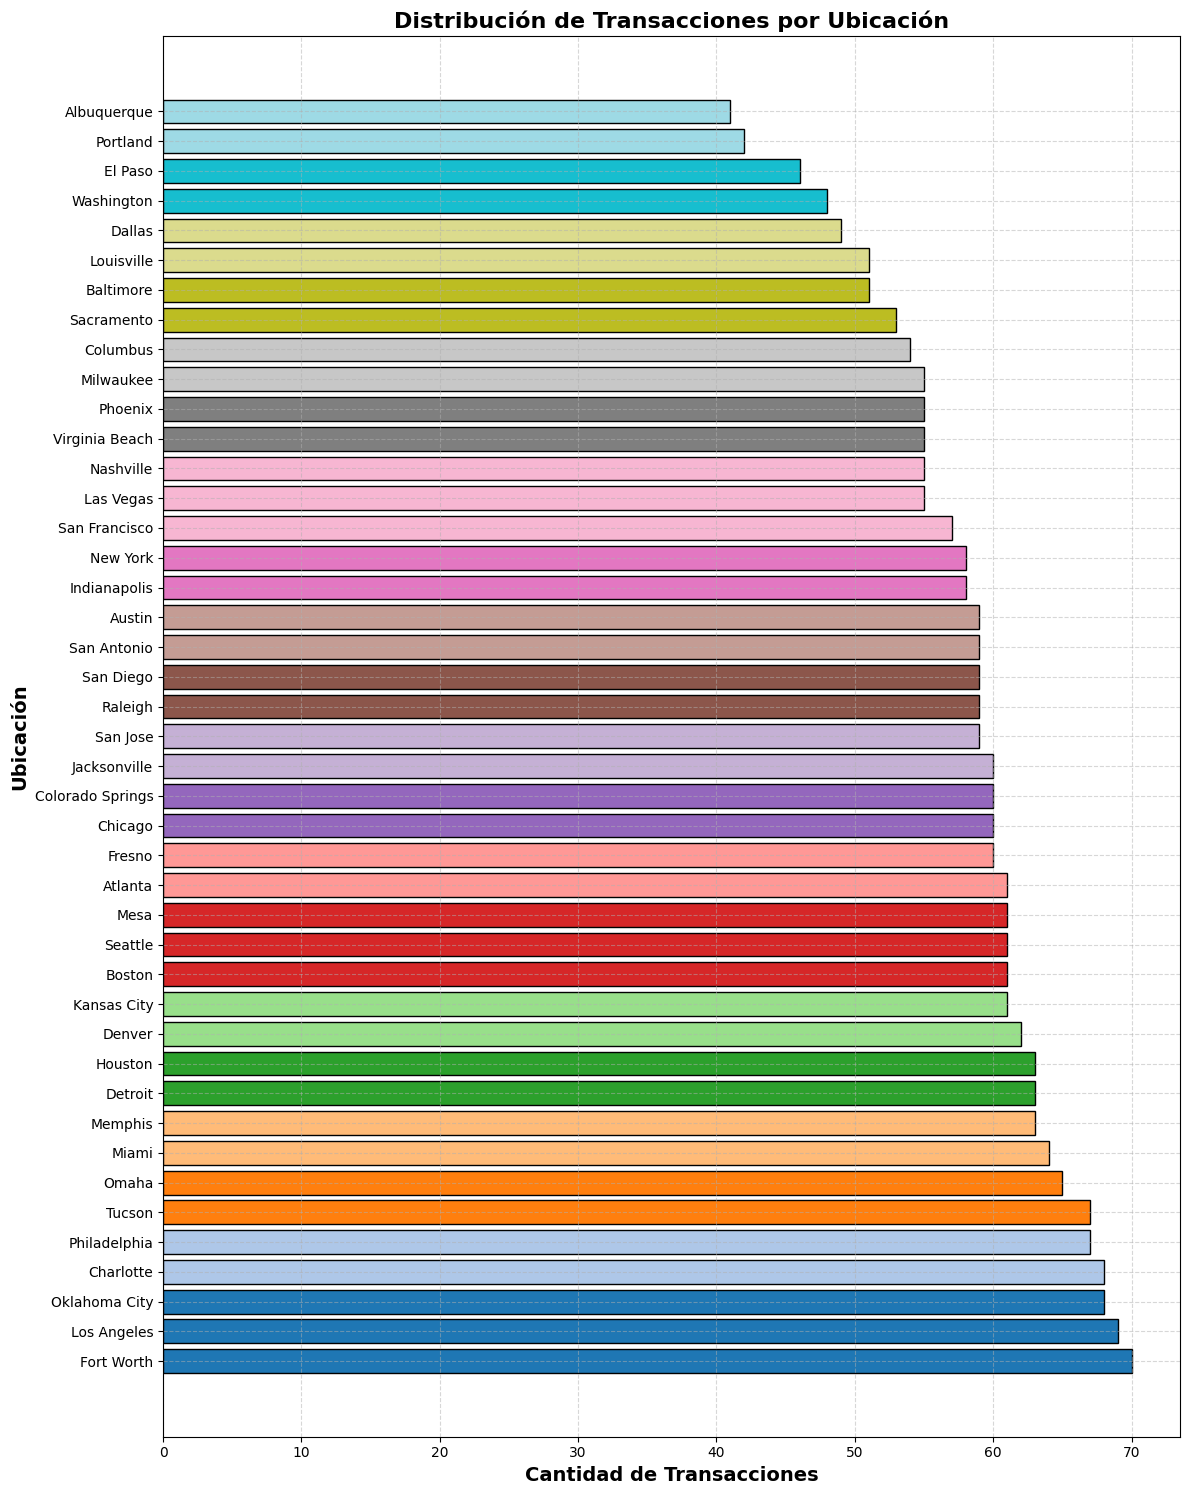

In [ ]:
# @title Location
channel_counts = a['Location'].value_counts()

num_colors = len(channel_counts)
cmap = plt.get_cmap("tab20")
colors = [cmap(i / num_colors) for i in range(num_colors)]

plt.figure(figsize=(12, len(channel_counts) * 0.35))
plt.barh(channel_counts.index, channel_counts.values, color=colors, edgecolor='black')

plt.xlabel("Cantidad de Transacciones", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Ubicación", fontsize=14, fontweight='bold', color='black')
plt.title("Distribución de Transacciones por Ubicación", fontsize=16, fontweight='bold', color='black')

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

El gráfico de barras muestra la **distribución de transacciones por ubicación**. Cada barra representa la cantidad de transacciones realizadas en diferentes ciudades, ordenadas de mayor a menor. Las ciudades con mayor cantidad de transacciones son **Fort Worth** y **Los Angeles**, que se encuentran al final del gráfico con barras más largas, mientras que **Albuquerque**, **Portland** y **El Paso** tienen la menor cantidad de transacciones. El gráfico tiene una variabilidad en la cantidad de transacciones por ciudad, con algunas ciudades mostrando una actividad mucho mayor que otras, lo que refleja las diferencias en la cantidad de transacciones realizadas en cada ubicación.

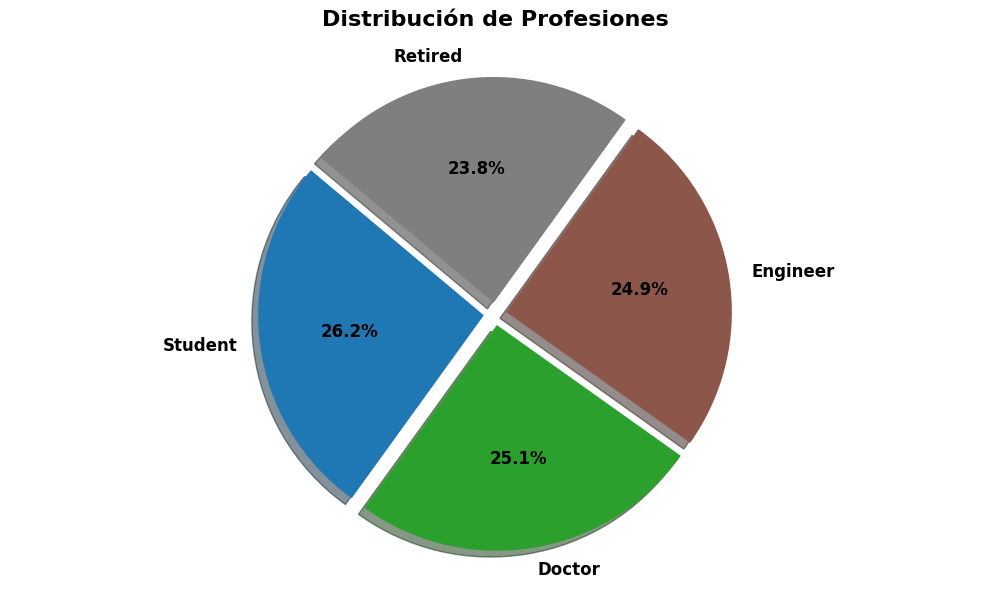

In [ ]:
# @title CustomerOccupation
channel_counts = a['CustomerOccupation'].value_counts()

num_colors = len(channel_counts)
cmap = plt.get_cmap("tab10")
colors = [cmap(i / num_colors) for i in range(num_colors)]

explode = [0.05] * num_colors

plt.figure(figsize=(10, 6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, startangle=140, shadow=True,
        textprops={'fontsize': 12, 'weight': 'bold', 'color': 'black'})

plt.title('Distribución de Profesiones', fontsize=16, weight='bold', color='black', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

El gráfico de sectores muestra la **distribución de profesiones** en una población. La categoría **Student** (Estudiante) representa el 26.2% del total, siendo la mayor proporción. Le sigue **Doctor** con el 25.1%, **Engineer** (Ingeniero) con el 24.9%, y finalmente **Retired** (Jubilado) con el 23.8%. El gráfico muestra una distribución relativamente equilibrada entre las distintas profesiones, con una ligera superioridad en los estudiantes.

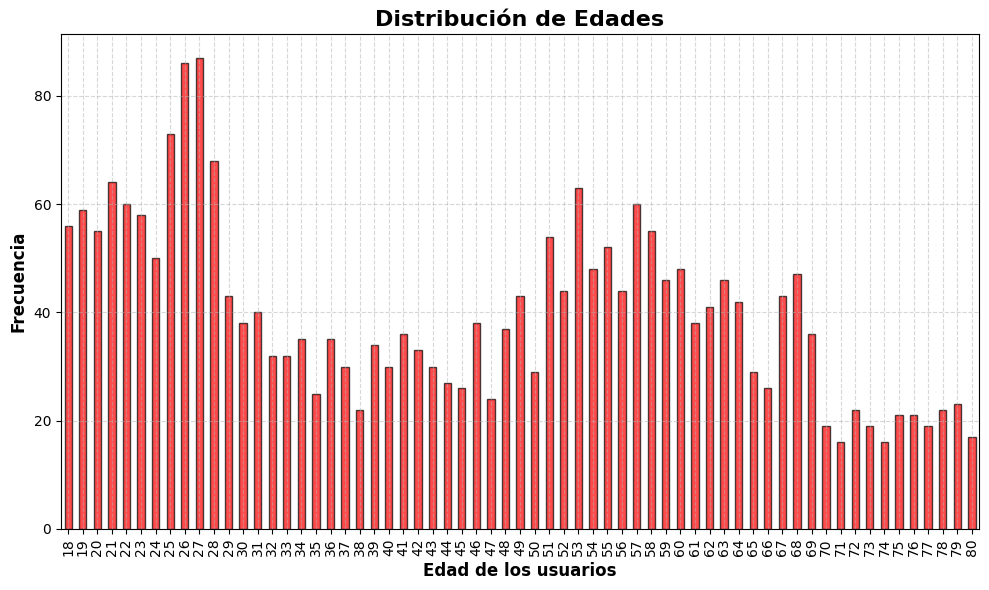

In [ ]:
# @title CustomerAge
plt.figure(figsize=(10, 6))
a['CustomerAge'].value_counts().sort_index().plot(kind='bar', color='red', alpha=0.7, edgecolor='black')
plt.xlabel('Edad de los usuarios', fontsize=12, weight='bold', color='black')
plt.ylabel('Frecuencia', fontsize=12, weight='bold', color='black')
plt.title('Distribución de Edades', fontsize=16, weight='bold', color='black')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

El gráfico de barras muestra la **distribución de edades** de los usuarios. Se observa una alta frecuencia de usuarios jóvenes, particularmente en el rango de **20 a 25 años**, donde se registra el mayor número de transacciones. Luego, la frecuencia disminuye gradualmente a medida que aumentan las edades. Sin embargo, se notan picos de frecuencia en los rangos de **18 a 31 años** y **51 a 60 años**, sugiriendo una mayor participación de usuarios en esos grupos etarios. Además, la frecuencia disminuye de forma continua a partir de los **60 años**, con una ligera recuperación en el rango de **67 a 69 años**. El gráfico indica que los usuarios más jóvenes y de mediana edad son los más activos, mientras que la participación de los más mayores es menor.

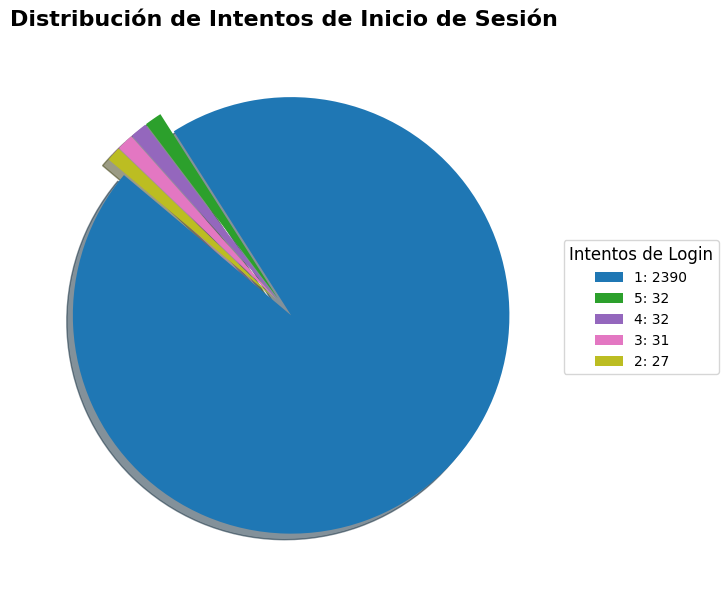

In [ ]:
# @title LoginAttempts
channel_counts = a['LoginAttempts'].value_counts()

num_colors = len(channel_counts)
cmap = plt.get_cmap("tab10")
colors = [cmap(i / num_colors) for i in range(num_colors)]

explode = [0.05] * num_colors

plt.figure(figsize=(10, 6))
wedges, texts = plt.pie(channel_counts, labels=None,
                         colors=colors, explode=explode, startangle=140,
                         shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})

legend_labels = [f"{label}: {value}" for label, value in zip(channel_counts.index, channel_counts.values)]

plt.legend(wedges, legend_labels, title="Intentos de Login", loc="center left",
           bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=12)

plt.title('Distribución de Intentos de Inicio de Sesión', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

El gráfico de sectores muestra la **distribución de intentos de inicio de sesión**. La mayoría de los intentos corresponden al valor **1** (2390 intentos), que ocupa la mayor parte del gráfico. Los intentos con valores **5** y **4** tienen cantidades mucho menores, con **32 intentos** en cada uno. Los intentos con valores **3** y **2** son aún menos frecuentes, con **31** y **27 intentos** respectivamente. Este gráfico destaca que la mayoría de los intentos de inicio de sesión son únicos, mientras que los intentos con múltiples valores son poco comunes.

## **Clasificación**

El uso de clasificación es adecuado para este proyecto porque el objetivo principal es predecir el TransactionType, que es una variable categórica con valores discretos como "Crédito" o "Débito". La clasificación es la técnica estándar cuando se trata de predecir una variable que pertenece a un conjunto de clases predefinidas. Además, el TransactionType debe ser el "ground truth" ya que es la variable objetivo que queremos predecir. Este es el valor real y conocido en el dataset que el modelo debe aprender a predecir a partir de las características disponibles, como el monto de la transacción, el saldo de la cuenta, la edad del cliente, entre otras. Al usar TransactionType como "ground truth", podemos evaluar de manera precisa el desempeño del modelo mediante métricas de clasificación como la precisión.




## Estimadores Sin parametros



In [ ]:
#@title Convertir Valores Categóricos en Valores Numéricos
from sklearn.preprocessing import LabelEncoder

a =  pd.read_csv("/content/drive/MyDrive/ProyectoIA1/data/bank_transactions_data_2.csv")
a= a.drop(['TransactionDate', 'PreviousTransactionDate'], axis=1)

df_encoded = a.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded.head())

   TransactionID  AccountID  TransactionAmount  TransactionType  Location  \
0              0        126              14.09                1        36   
1              1        450             376.24                1        15   
2              2         18             126.29                1        23   
3              3         68             184.50                1        33   
4              4        406              13.45                0         1   

   DeviceID  IP Address  MerchantID  Channel  CustomerAge  CustomerOccupation  \
0       365         186          14        0           70                   0   
1        50          82          51        0           68                   0   
2       229         343           8        2           19                   3   
3       182         300           1        2           26                   3   
4       298         501          90        2           26                   3   

   TransactionDuration  LoginAttempts  AccountBala

El proceso de **Label Encoding** ha transformado correctamente las variables categóricas, como **TransactionType**, **Location** y **CustomerOccupation**, en valores numéricos. Esto facilita su integración en modelos de machine learning. Aunque el encoding ha sido efectivo, es importante destacar que las categorías codificadas no tienen un orden natural, por lo que se debe tener cuidado al interpretar los resultados. El dataframe resultante está listo para ser utilizado en modelos predictivos, asegurando que las variables categóricas ya no presenten obstáculos para el análisis.

In [ ]:
#@title Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

X = df_encoded.drop('TransactionType', axis=1).values
y = df_encoded['TransactionType'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)
est = DecisionTreeClassifier()
est.fit(X_train, y_train)
print("Accuracy en test set:", accuracy_score(est.predict(X_test), y_test))

Accuracy en test set: 0.6699801192842942


El conjunto de datos presenta un desequilibrio evidente en el ground truth "TransactionType", con 1944 registros de tipo débito y solo 568 de tipo crédito. Esta desproporción puede afectar el desempeño del modelo, ya que los clasificadores como el árbol de decisión, cuando se entrenan sin ajuste de parámetros, tienden a favorecer la clase mayoritaria. En este caso, un modelo que predijera siempre "débito" lograría una exactitud de aproximadamente 77%, por lo que un accuracy de 0.669 indica que el árbol no está haciendo predicciones triviales, pero tampoco logra un rendimiento óptimo al generalizar sobre ambas clases. Esto sugiere que el modelo podría estar teniendo dificultades para identificar correctamente las transacciones de tipo crédito, lo cual es importante considerar, ya que el accuracy por sí solo puede resultar engañoso en contextos de clases desbalanceadas. Por tanto, se recomienda complementar el análisis con métricas como precisión, sensibilidad y matriz de confusión para evaluar el comportamiento del modelo en cada clase.










In [ ]:
#@title Random Forest Classifier (RF)
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer

# --- Definimos TransactionType como ground truth
X = df_encoded.drop('TransactionType', axis=1).values
y = df_encoded['TransactionType'].values

#--- Entrenamos el modelo dejando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)
est = RandomForestClassifier()
est.fit(X_train, y_train)
print("Accuracy en test set:", accuracy_score(est.predict(X_test), y_test))

Accuracy en test set: 0.7852882703777336


El modelo de clasificación basado en Random Forest alcanzó una exactitud de aproximadamente 0.791 al entrenarse sobre el conjunto de datos, donde TransactionType es el "ground truth" como es sabido. Este resultado supera al obtenido con el árbol de decisión simple, lo cual era predecible, ya que Random Forest, al ser un ensamblaje de múltiples árboles, tiende a ofrecer una mayor capacidad de generalización. No obstante, es crucial considerar el desbalance presente en las clases de esta variable, ya que dicho desequilibrio puede hacer que la métrica de accuracy sea engañosa. Un modelo que favorezca la clase mayoritaria podría obtener una puntuación alta, pero sin capturar adecuadamente la clase minoritaria.

In [ ]:
#@title Support vector Machine (SVM)
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer

# --- Definimos TransactionType como ground truth
X = df_encoded.drop('TransactionType', axis=1).values
y = df_encoded['TransactionType'].values

#--- Entrenamos el modelo dejando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)
est = SVC()
est.fit(X_train,y_train)
print("Accuracy en test set:", accuracy_score(est.predict(X_test), y_test))

Accuracy en test set: 0.7952286282306164


El modelo de clasificación con el Support Vector Classifier (SVC) ha obtenido una exactitud de 0.795, lo que es ligeramente superior a la obtenida con el Random Forest (0.791) y el Decision Tree (0.669). Esto indica que el SVC, en este caso, ha logrado una mayor capacidad de generalización en comparación con los otros modelos, aunque aún enfrenta el desafío del desequilibrio en las clases. Sin embargo, al igual que con los otros clasificadores, el accuracy podría ser una métrica engañosa debido al desbalance entre las clases débito y crédito. El modelo podría estar favoreciendo la clase mayoritaria (débito) y no capturando adecuadamente las transacciones de tipo crédito.

# ***SEGUNDA ENTREGA***

## Learning curves: DecisionTree, RandomForest y Support Vector Machine


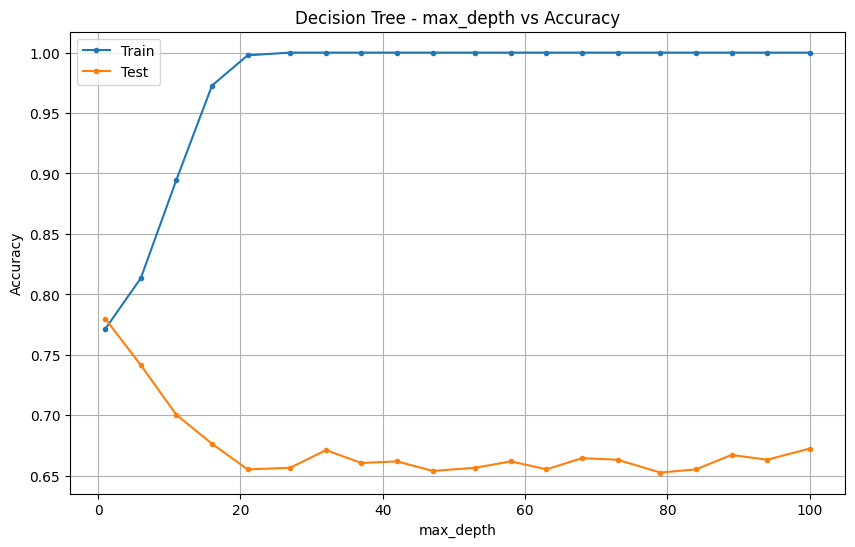

In [ ]:
#@title DecisionTree (max_depth)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_encoded.drop('TransactionType', axis=1).values
y = df_encoded['TransactionType'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

train_scores, test_scores = [], []
depths = np.linspace(1, 100, 20).astype(int)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label="Train", marker='.')
plt.plot(depths, test_scores, label="Test", marker='.')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree - max_depth vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()

El gráfico de precisión frente a la profundidad máxima del árbol de decisión revela un claro sobreajuste del modelo: a medida que el parámetro *max\_depth* aumenta, la precisión en el conjunto de entrenamiento alcanza rápidamente el 100%, mientras que la precisión en el conjunto de prueba disminuye y se estabiliza cerca del 65%. Este comportamiento sugiere que el modelo comienza a memorizar las transacciones, en lugar de aprender patrones generalizables, lo cual reduce su capacidad para predecir correctamente nuevas observaciones. En este caso, se observa que el desempeño en el conjunto de prueba es óptimo cuando la profundidad del árbol está entre 3 y 5, lo que sugiere que un modelo más simple sería más eficaz para predecir el *TransactionType*, dada su naturaleza categórica.

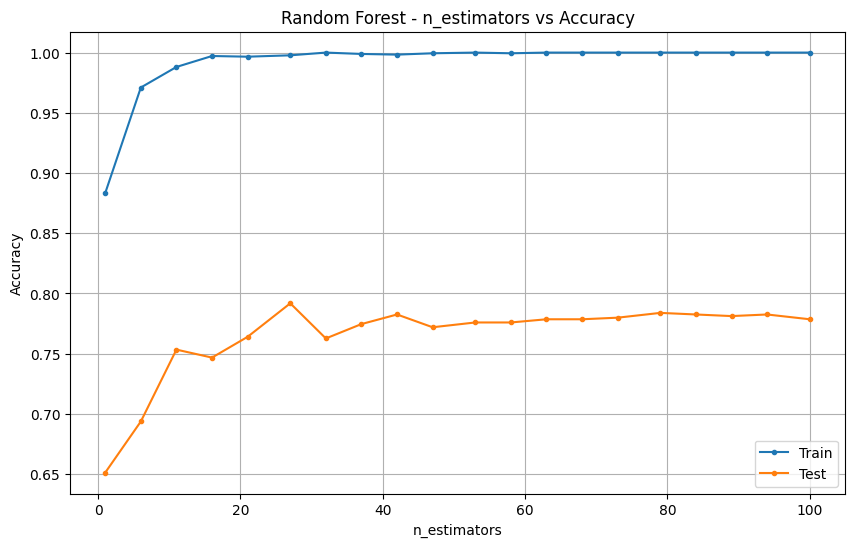

In [ ]:
#@title Random Forest (n_estimators)
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_encoded.drop('TransactionType', axis=1).values
y = df_encoded['TransactionType'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

train_scores, test_scores = [], []
n_estimators_range  = np.linspace(1, 100, 20).astype(int)

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label="Train", marker='.')
plt.plot(n_estimators_range, test_scores, label="Test", marker='.')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest - n_estimators vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()

El gráfico que relaciona el número de estimadores (n_estimators) con la precisión (accuracy) en un modelo de Random Forest muestra un comportamiento más estable y robusto en comparación con el árbol de decisión individual. A medida que se incrementa la cantidad de árboles, la precisión en el conjunto de entrenamiento rápidamente alcanza casi el 100%, pero lo más importante es que la precisión en el conjunto de prueba se mantiene relativamente constante, oscilando alrededor del 77-79% después de superar los 10 árboles. Esto sugiere que el modelo logra una generalización más efectiva, evitando el sobreajuste severo que se observaba anteriormente. Aunque sigue existiendo una ligera diferencia entre el rendimiento en entrenamiento y prueba, esta es mucho menor que en el árbol de decisión, lo que valida una de las principales ventajas de los Random Forest: su capacidad para reducir la varianza sin incrementar significativamente el sesgo. No obstante, dado el desbalance en las clases (predominancia de transacciones "Debit"), esta métrica de precisión podría seguir enmascarando un rendimiento desigual entre clases.

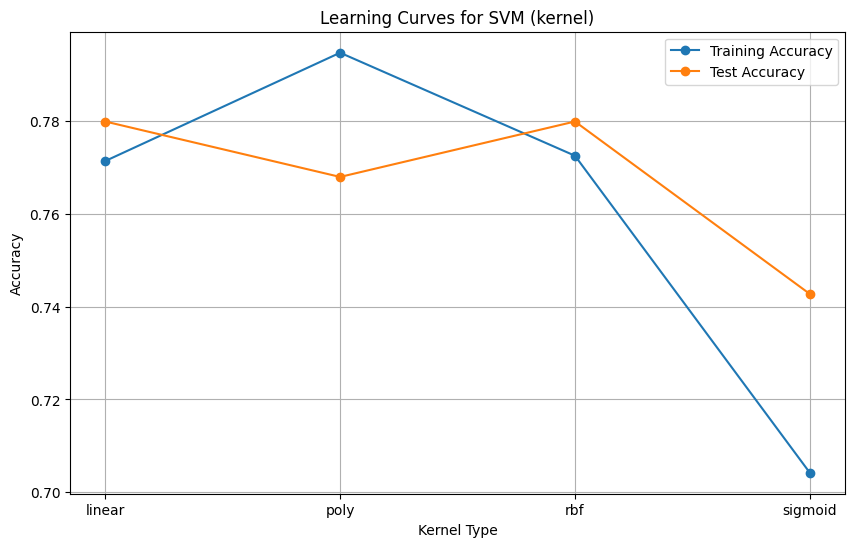

In [ ]:
#@title Support vector Machine (kernel)
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X = scaler.fit_transform(df_encoded.drop('TransactionType', axis=1).values)
y = df_encoded['TransactionType'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

train_accuracies_svm = []
test_accuracies_svm = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=21, max_iter=10000)
    svm_model.fit(X_train, y_train)

    y_pred_train_svm = svm_model.predict(X_train)
    y_pred_test_svm = svm_model.predict(X_test)

    train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
    test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

    train_accuracies_svm.append(train_accuracy_svm)
    test_accuracies_svm.append(test_accuracy_svm)

plt.figure(figsize=(10, 6))
plt.plot(kernels, train_accuracies_svm, label='Training Accuracy', marker='o')
plt.plot(kernels, test_accuracies_svm, label='Test Accuracy', marker='o')
plt.title('Learning Curves for SVM (kernel)')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

El gráfico comparativo de las curvas de aprendizaje para los distintos kernels del modelo SVM muestra una interesante variabilidad en el rendimiento tanto en el conjunto de entrenamiento como en el de prueba. El kernel poly presenta la mayor precisión en el conjunto de entrenamiento (aproximadamente 80%) y una caída leve en la precisión del conjunto de prueba (alrededor de 77%), lo que sugiere que ha logrado capturar patrones relevantes sin comprometer su capacidad de generalización. Por otro lado, los kernels linear y rbf muestran un comportamiento equilibrado, con precisiones cercanas al 77-78% en entrenamiento y prueba, indicando una segmentación confiable y estable para las transacciones. Sin embargo, el kernel sigmoid muestra un comportamiento inusual: la precisión en el conjunto de prueba supera a la del conjunto de entrenamiento (~74% vs. ~70%), lo que podría indicar una mejor adaptación a las características del conjunto de prueba o una mayor regularización en el modelo. En otras palabras, las curvas de aprendizaje sugieren que el rendimiento de todos los kernels es sólido, pero el kernel rbf parece ser el que mejor generaliza para este dataset con TransactionType como "ground truth".

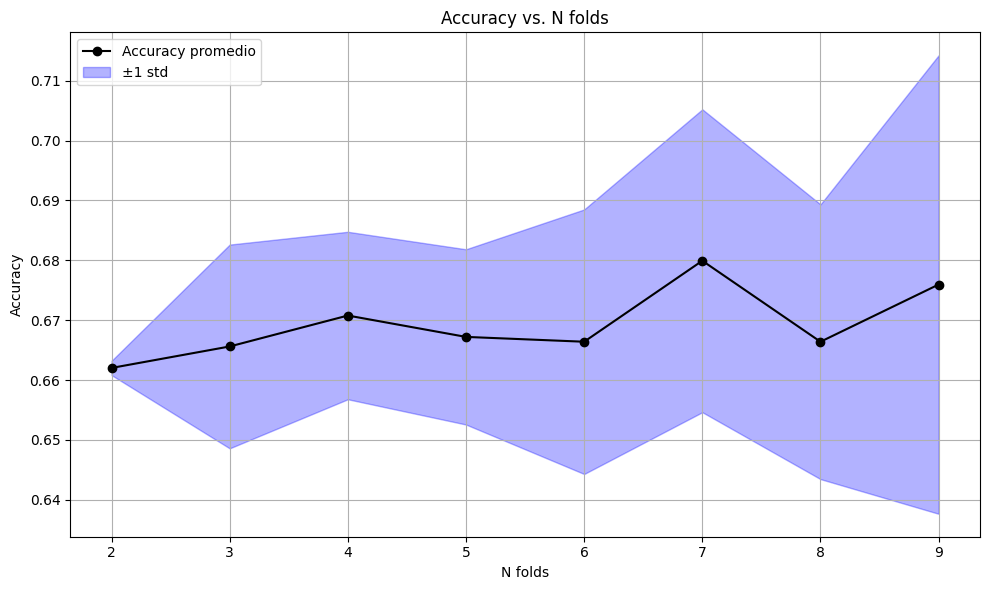

In [ ]:
#@title Learning curves para Cross-Validation (Decision Tree DT)
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier

def show_curve(estimator):
    means, stds = [], []
    nfolds_range = range(2, 10)

    for nfolds in nfolds_range:
        cv = KFold(n_splits=nfolds, shuffle=True, random_state=21)
        scores = cross_val_score(estimator, X, y, cv=cv, scoring='accuracy')
        means.append(np.mean(scores))
        stds.append(np.std(scores))

    means = np.array(means)
    stds = np.array(stds)

    plt.figure(figsize=(10, 6))
    plt.plot(nfolds_range, means, label="Accuracy promedio", color="black", marker='o')
    plt.fill_between(nfolds_range, means - stds, means + stds, color="blue", alpha=.3, label="±1 std")
    plt.xlabel("N folds")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs. N folds")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Uso
clf = DecisionTreeClassifier()
show_curve(clf)

El análisis de la curva de aprendizaje con validación cruzada para el modelo de Árbol de Decisión muestra una ligera mejora en la precisión promedio a medida que aumenta el número de particiones (folds), alcanzando su punto máximo con 8 particiones (\~68.1%). Este comportamiento indica que el modelo se beneficia de una mayor diversidad en las particiones de entrenamiento/prueba, lo que a su vez mejora la estimación de su capacidad de generalización. Sin embargo, la variabilidad en la precisión, reflejada en el área sombreada (±1 desviación estándar), sugiere que el modelo es sensible a la forma en que se dividen los datos, especialmente cuando se utilizan un número bajo de particiones (4 y 5 folds). A pesar de que 8 folds da el mejor rendimiento promedio, la gran variabilidad indica que el modelo no siempre produce resultados consistentes, lo que resalta la necesidad de un ajuste fino en la partición de los datos.

# ***TERCERA ENTREGA***

## **Implementacion de clasificación en una red neuronal**




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras

keras.utils.set_random_seed(21)

def train_classification_model(a, target_column, layers=3, epochs=10):
    y = a[target_column]
    X = a.drop(columns=[target_column])

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.10, random_state=21)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)))

    for _ in range(layers):
        model.add(tf.keras.layers.Dense(128, activation='relu'))

    model.add(tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.SGD(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, test_acc

# Entrenando modelos con 3, 6 y 10 capas
model_3_layers, acc_3 = train_classification_model(df_encoded, target_column="TransactionType", layers=3, epochs=10)
model_6_layers, acc_6 = train_classification_model(df_encoded, target_column="TransactionType", layers=6, epochs=10)
model_10_layers, acc_10 = train_classification_model(df_encoded, target_column="TransactionType", layers=10, epochs=10)

# Imprimir resultados con formato bonito
print("\nResultados del modelo de clasificación:\n")
print("-" * 40)
print(f"Modelo con 3 capas ocultas: \n\tPrecisión de test: {acc_3 * 100:.2f}%\n")
print("-" * 40)
print(f"Modelo con 6 capas ocultas: \n\tPrecisión de test: {acc_6 * 100:.2f}%\n")
print("-" * 40)
print(f"Modelo con 10 capas ocultas: \n\tPrecisión de test: {acc_10 * 100:.2f}%\n")
print("-" * 40)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7500 - loss: 0.6317 - val_accuracy: 0.7778 - val_loss: 0.5427
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5530 - val_accuracy: 0.7778 - val_loss: 0.5296
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5477 - val_accuracy: 0.7778 - val_loss: 0.5265
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.5460 - val_accuracy: 0.7778 - val_loss: 0.5243
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.5443 - val_accuracy: 0.7778 - val_loss: 0.5222
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5426 - val_accuracy: 0.7778 - val_loss: 0.5203
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7656 - loss: 0.5410 - val_accuracy: 0.7778 - val_loss: 0.5185
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7656 - loss: 0.5395 - val_accuracy: 0.7778 - val_loss: 0.5166
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7479 - loss: 0.6478 - val_accuracy: 0.7778 - val_loss: 0.5594
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5604 - val_accuracy: 0.7778 - val_loss: 0.5329
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5460 - val_accuracy: 0.7778 - val_loss: 0.5289
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7656 - loss: 0.5445 - val_accuracy: 0.7778 - val_loss: 0.5279
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5440 - val_accuracy: 0.7778 - val_loss: 0.5271
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5434 - val_accuracy: 0.7778 - val_loss: 0.5264
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5427 - val_accuracy: 0.7778 - val_loss: 0.5257
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.5421 - val_accuracy: 0.7778 - val_loss: 0.5249
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7656 - loss: 0.6500 - val_accuracy: 0.7778 - val_loss: 0.5678
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5662 - val_accuracy: 0.7778 - val_loss: 0.5369
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7656 - loss: 0.5476 - val_accuracy: 0.7778 - val_loss: 0.5308
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7656 - loss: 0.5449 - val_accuracy: 0.7778 - val_loss: 0.5296
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7656 - loss: 0.5448 - val_accuracy: 0.7778 - val_loss: 0.5293
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7656 - loss: 0.5447 - val_accuracy: 0.7778 - val_loss: 0.5291
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7656 - loss: 0.5446 - val_accuracy: 0.7778 - val_loss: 0.5289
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5445 - val_accuracy: 0.7778 - val_loss: 0.5287
Epo

El análisis de los resultados muestra que el modelo alcanza rápidamente su mejor desempeño en las primeras *epochs*, estabilizándose en torno al 77.78% de precisión después de la tercera o cuarta epoch. Esto sugiere que 10 epochs son suficientes para que el modelo converja, y que aumentar el número de capas no mejora significativamente la precisión, lo cual apunta a la necesidad de un modelo más simple. La reducción progresiva en los valores de pérdida indica una mejora, pero es leve, lo que deja espacio para una optimización adicional. Aunque se está utilizando el optimizador Adam, ajustar sus parámetros podría ayudar a lograr una reducción más significativa en la pérdida y mejorar la precisión. Reducir las epochs a 5 o 7 y disminuir el número de capas ocultas podría optimizar el uso de recursos sin sacrificar el rendimiento.


## **Reducción de Dimensionalidad con PCA e implementación de algoritmos de aprendizaje no supervisado**

Antes de PCA:  (2512, 14)
Después de PCA:  (2512, 2)


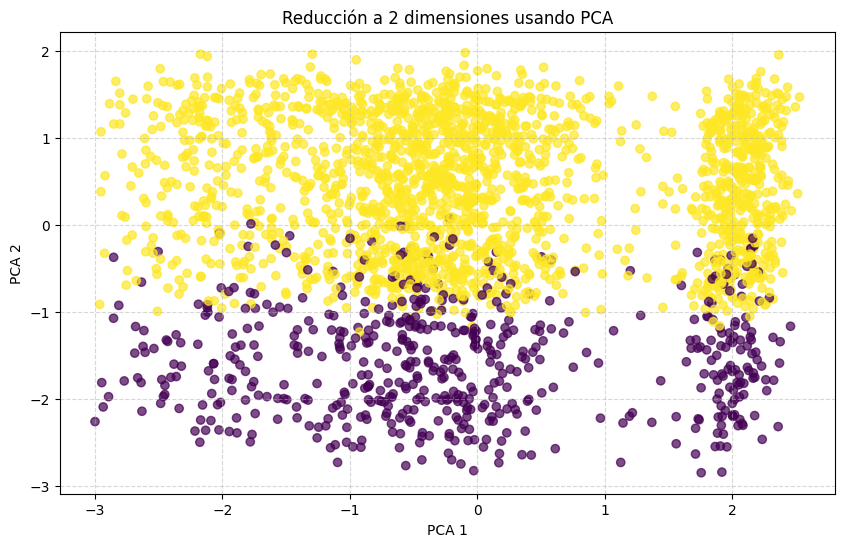

In [ ]:
#@title Reducción de Dimensionalidad con PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_features = scaler.fit_transform(df_encoded)

print('Antes de PCA: ', normalized_features.shape)

pca = PCA(n_components=2, random_state=21)
pca_features = pca.fit_transform(normalized_features)

print('Después de PCA: ', pca_features.shape)

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Reducción a 2 dimensiones usando PCA")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

La reducción de dimensionalidad mediante *PCA* transforma 14 características a solo 2, lo que facilita la visualización de los datos y ayuda a identificar patrones en las transacciones. Antes de aplicar PCA, se estandarizan los datos utilizando *StandardScaler* para evitar que las diferencias de escala influyan en la transformación. El gráfico resultante muestra que, aunque las clases de transacciones están bastante separadas, aún existen algunas áreas con puntos solapados, lo que indica que el modelo puede tener dificultades para diferenciar todas las clases de manera perfecta. Aunque PCA mejora la velocidad y visualización, podría haber una pérdida de información relevante que justifique explorar el uso de más componentes para representar mejor la variabilidad y reducir la superposición entre las clases de *TransactionType*.

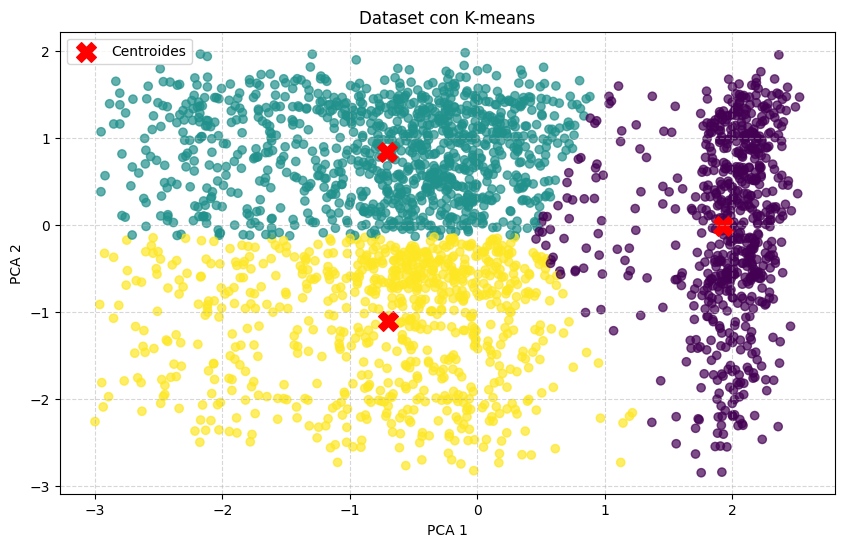

In [ ]:
#@title Implementación de K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=21)
kmeans_clusters = kmeans.fit_predict(pca_features)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', label='Centroides', s=200)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Dataset con K-means")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

El gráfico generado por el algoritmo **K-Means** muestra cómo los datos se agrupan en tres clusters, representados por diferentes colores. Los centroides de cada grupo, marcados con una "X" roja, indican las zonas de mayor concentración de puntos. Aunque la separación entre los clusters es clara, en los límites de algunos grupos se encuentran puntos que se mezclan con otros, lo que sugiere que la división entre las transacciones de **débito** y **crédito** no es completamente rígida. Este comportamiento podría reflejar la distribución desigual de las transacciones, ya que las de **débito** son mucho más frecuentes que las de **crédito**, lo que genera un patrón más denso en el espacio de características para **débito**. A pesar de esto, el modelo ha agrupado los datos de manera efectiva, proporcionando una visión general de cómo se distribuyen las transacciones en el espacio de características y resaltando la necesidad de ajustar los parámetros para mejorar la segmentación entre las clases.


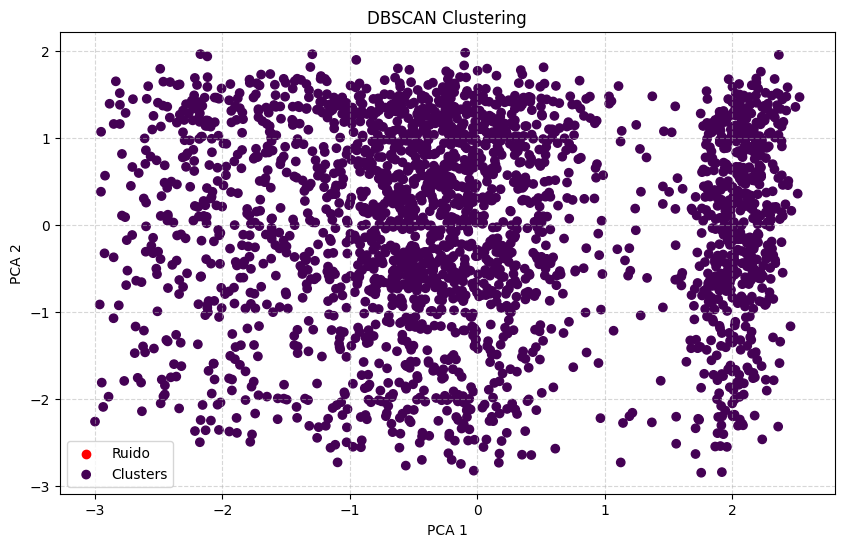

Cluster IDs asignados por DBSCAN: [0]


In [ ]:
#@title Implementación de DBSCAN
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

dbscan = DBSCAN(min_samples=2)
DBSCAN_Cluster = dbscan.fit_predict(pca_features)

plt.figure(figsize=(10, 6))
plt.title("DBSCAN Clustering")
noise_points = DBSCAN_Cluster == -1
plt.scatter(pca_features[noise_points, 0], pca_features[noise_points, 1], color='red', label='Ruido', marker='o')
plt.scatter(pca_features[~noise_points, 0], pca_features[~noise_points, 1], c=DBSCAN_Cluster[~noise_points], marker='o', label='Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()
print("Cluster IDs asignados por DBSCAN:", np.unique(DBSCAN_Cluster))

El gráfico generado por el algoritmo DBSCAN muestra cómo las transacciones de débito y crédito se agrupan en función de su densidad, con un solo cluster claramente definido, representado por los puntos morados, sin puntos clasificados como ruido. Este comportamiento sugiere que DBSCAN ha agrupado las transacciones en una única clase, probablemente debido a que las transacciones de débito (más frecuentes en el conjunto de datos, con 1945 registros) dominan la segmentación, y las transacciones de crédito (con solo 568 registros) no tienen suficiente peso para formar un cluster separado. La falta de ruido también indica que DBSCAN no ha identificado transacciones atípicas que se desvíen significativamente de los patrones generales, lo cual puede ser un buen indicador de que las transacciones de débito siguen un patrón mucho más consistente que las de crédito. Este comportamiento subraya la importancia de ajustar el valor de eps para mejorar la segmentación y asegurar que las transacciones se clasifiquen correctamente, minimizando el riesgo de sobreajuste o de una clasificación errónea de las transacciones. Si se requiere una mejor separación entre débito y crédito, sería útil realizar un ajuste más fino en los parámetros del algoritmo o explorar un enfoque supervisado para lograr una clasificación más precisa.